# <center>Simple Linear Regression




Here is an application of simple linear regression (SLR) for a dataset of fuel consumption from cars with different motor characteristics.

## Importing Needed packages

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import seaborn as sns 
sns.set()

## Downloading Data

In [42]:
path="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv"

<h2 id="understanding_data">Understanding the Data</h2>


We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<h2 id="reading_data">Reading the data in</h2>

In [43]:
df = pd.read_csv(path)

# take a look at the dataset
df.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Exploratory data analysis.

In [44]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [45]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Lets select some features to explore more.

### Histograms of features.

In [46]:
translator = {'ENGINESIZE':'Engine Size',
              'CYLINDERS':'Number of cylinders',
              'FUELCONSUMPTION_COMB':'Fuel Consumtion Combinated (L/100 Km)',
              'CO2EMISSIONS':'CO2 Emissions'
              
}


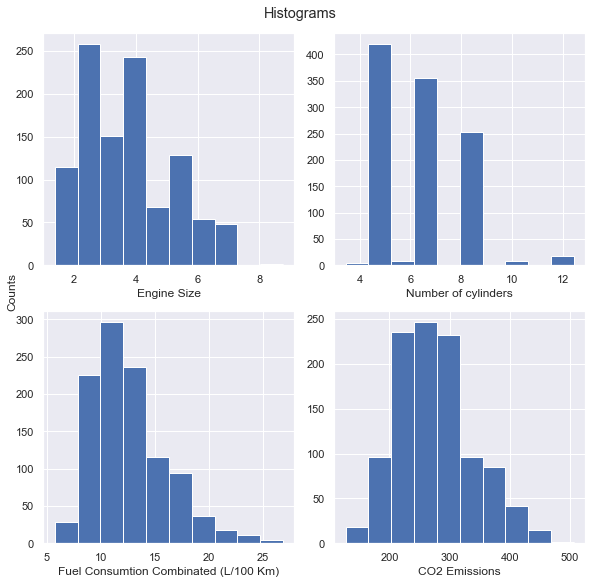

In [47]:
fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(8,8),constrained_layout=True)
fig.suptitle('Histograms')
fig.text(-0.009, 0.5, 'Counts', va='center', rotation='vertical')
k=0
for i in range (2):
    for j in range(2):
        axs[i,j].hist(df[[*translator][k]],align='right')
        axs[i,j].set(xlabel=translator[[*translator][k]])
        k=k+1

### Scatter Plots using CO2 Emission as a Objective.

IndexError: list index out of range

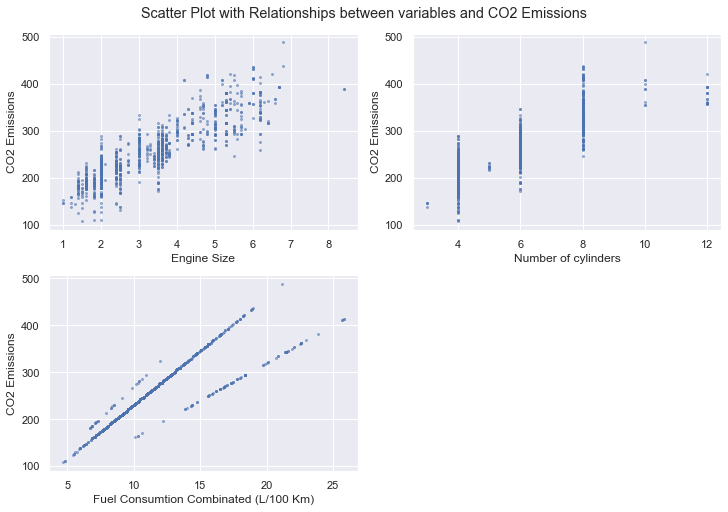

In [48]:
ind = {'ENGINESIZE':'Engine Size',
              'CYLINDERS':'Number of cylinders',
              'FUELCONSUMPTION_COMB':'Fuel Consumtion Combinated (L/100 Km)',
            
}

objective = {
    'CO2EMISSIONS':'CO2 Emissions'
}

fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(10,7),constrained_layout=True)
fig.suptitle('Scatter Plot with Relationships between variables and CO2 Emissions')
fig.delaxes(axs[1][1])
k=0
for i in range (2):
    for j in range(2):
        axs[i,j].plot(df[[*ind][k]],df[[*objective][0]],'o', markersize=2, alpha=0.5)
        axs[i,j].set(xlabel=ind[[*ind][k]], ylabel=objective[[*objective][0]])
        k=k+1



## **Simple Regression Model**
Linear Regression fits a linear model with coefficients $\theta = (\theta_1, ..., \theta_n)$ to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

### Creating train and test dataset

Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

In [49]:
from sklearn.model_selection import train_test_split

#Defining features and objective
y=df['CO2EMISSIONS']
X=df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(853, 4) (853,)
(214, 4) (214,)


### Train data distribution

IndexError: list index out of range

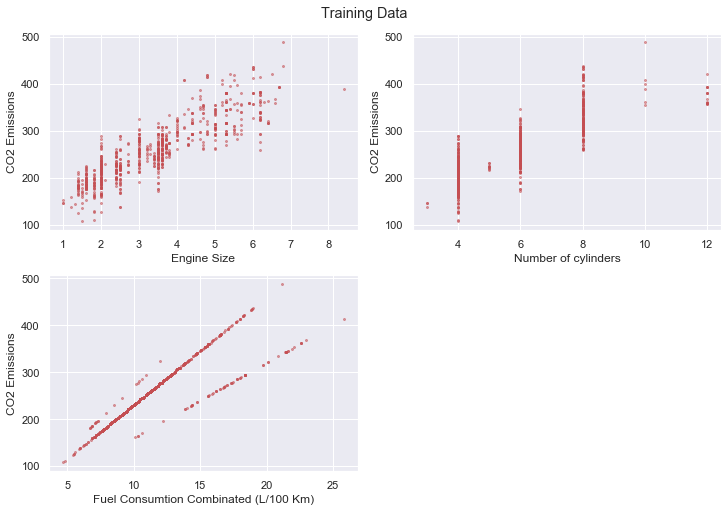

In [50]:
ind = {'ENGINESIZE':'Engine Size',
              'CYLINDERS':'Number of cylinders',
              'FUELCONSUMPTION_COMB':'Fuel Consumtion Combinated (L/100 Km)',
            
}

objective = {
    'CO2EMISSIONS':'CO2 Emissions'
}

fig, axs = plt.subplots(ncols=2, nrows=2,figsize=(10,7),constrained_layout=True)
fig.suptitle('Training Data')
fig.delaxes(axs[1][1])
k=0
for i in range (2):
    for j in range(2):
        axs[i,j].plot(X_train[[*ind][k]],y_train,'o', color='r', markersize=2, alpha=0.5)
        axs[i,j].set(xlabel=ind[[*ind][k]], ylabel=objective[[*objective][0]])
        k=k+1

### Modeling
Using sklearn package to model data.

In [51]:
#Engine Size Regression
from sklearn import linear_model
regr1 = linear_model.LinearRegression()
train_x1 = np.asanyarray(X_train[['ENGINESIZE']])
train_y1 = np.asanyarray(y_train)
regr1.fit (train_x1, train_y1)
# The coefficients
print ('Coefficients: ', regr1.coef_)
print ('Intercept: ',regr1.intercept_)

Coefficients:  [39.25250236]
Intercept:  125.48574863231127


In [52]:
#Cylinders Regression
from sklearn import linear_model
regr2 = linear_model.LinearRegression()
train_x2 = np.asanyarray(X_train[['CYLINDERS']])
train_y2 = np.asanyarray(y_train)
regr2.fit (train_x2, train_y2)
# The coefficients
print ('Coefficients: ', regr2.coef_)
print ('Intercept: ',regr2.intercept_)

Coefficients:  [29.58172088]
Intercept:  84.94678356628549


In [53]:
#Fuel Consuption Combinated Regression
from sklearn import linear_model
regr3 = linear_model.LinearRegression()
train_x3 = np.asanyarray(X_train[['FUELCONSUMPTION_COMB']])
train_y3 = np.asanyarray(y_train)
regr3.fit (train_x3, train_y3)
# The coefficients
print ('Coefficients: ', regr3.coef_)
print ('Intercept: ',regr3.intercept_)

Coefficients:  [16.80659737]
Intercept:  62.07676862593061


In [54]:
regr3.intercept_

62.07676862593061

### Plot outputs

we can plot the fit line over the data:

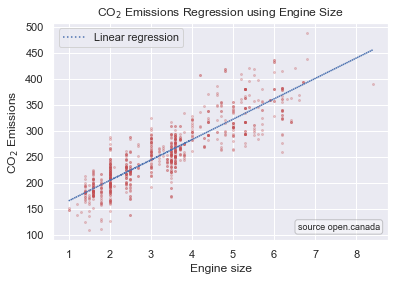

In [77]:
plt.plot(X_train.ENGINESIZE, y_train, 'o',markersize=2, color='r', alpha=0.25)
plt.plot(train_x1, regr1.coef_[0]*train_x1 + regr1.intercept_, ':', color='b', label='Linear regression')
plt.xlabel("Engine size")
plt.ylabel("CO$_2$ Emissions")
plt.title("CO$_2$ Emissions Regression using Engine Size")
plt.legend()
plt.annotate('source open.canada', xy=(0.73, 0.05), xycoords='axes fraction' ,bbox=dict(boxstyle="round", fc="white", ec="gray", alpha=0.4), size=9)
plt.savefig("img/lr1.png", dpi=300)
plt.show()

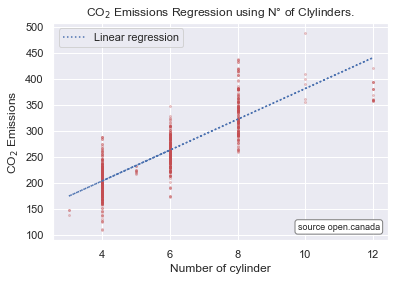

In [75]:
plt.plot(X_train.CYLINDERS, y_train, 'o',markersize=2, color='r', alpha=0.25)
plt.plot(train_x2, regr2.coef_[0]*train_x2 + regr2.intercept_, ':', color='b', label='Linear regression')
plt.xlabel("Number of cylinder")
plt.ylabel("CO$_2$ Emissions")
plt.title("CO$_2$ Emissions Regression using N° of Clylinders.")
plt.legend()
plt.annotate('source open.canada', xy=(0.73, 0.05), xycoords='axes fraction' ,bbox=dict(boxstyle="round", fc="white", ec="gray"), size=9)
plt.savefig("img/slr2.png", dpi=300)
plt.show()

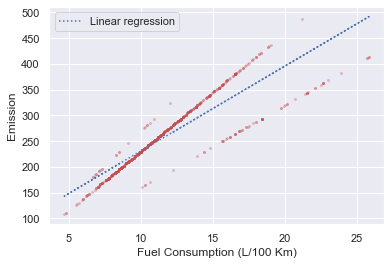

In [18]:
plt.plot(X_train.FUELCONSUMPTION_COMB, y_train, 'o',markersize=2, color='r', alpha=0.25)
plt.plot(train_x3, regr3.coef_[0]*train_x3 + regr3.intercept_, ':', color='b', label='Linear regression')
plt.xlabel("Fuel Consumption (L/100 Km)")
plt.ylabel("Emission")
plt.legend()
plt.show()

### Evaluation
We compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

In [19]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(X_test[['ENGINESIZE']])
test_y = np.asanyarray(y_test)
test_y_hat = regr1.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 21.88
Residual sum of squares (MSE): 877.25
R2-score: 0.69


In [20]:
test_x = np.asanyarray(X_test[['CYLINDERS']])
test_y = np.asanyarray(y_test)
test_y_hat = regr2.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 25.61
Residual sum of squares (MSE): 1060.28
R2-score: 0.62


In [21]:
test_x = np.asanyarray(X_test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(y_test)
test_y_hat = regr3.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 20.62
Residual sum of squares (MSE): 909.88
R2-score: 0.72


## **Tuning up the regression**

As we can see Fuel Consumption has the best evaluation scores, but the scatter plot suggest that we are dealing with three layers of data, let's insight on that.

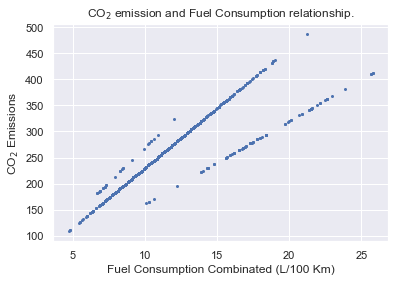

In [29]:
fig, ax = plt.subplots()
ax.plot(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS, 'o', markersize=2)
ax.set(xlabel="Fuel Consumption Combinated (L/100 Km)", ylabel="CO$_2$ Emissions")
ax.set_title("CO$_2$ emission and Fuel Consumption relationship.")
plt.show()


In [81]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

### Adding categorical variable using statsmodels

In [30]:
from sklearn.model_selection import train_test_split

#Defining features and objective
X=df[['FUELCONSUMPTION_COMB', 'CO2EMISSIONS','FUELTYPE']]
y=df.CO2EMISSIONS
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(853, 3) (853,)
(214, 3) (214,)


In [31]:
X_train.FUELTYPE.value_counts()

X    426
Z    338
E     72
D     17
Name: FUELTYPE, dtype: int64

In [32]:
a=X_train[X_train.FUELTYPE=="X"]
b=X_train[X_train.FUELTYPE=="Z"]
c=X_train[X_train.FUELTYPE=="E"]
d=X_train[X_train.FUELTYPE=="D"]

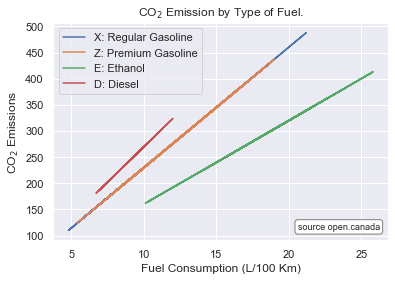

In [74]:
plt.plot(a.FUELCONSUMPTION_COMB, a.CO2EMISSIONS, label="X: Regular Gasoline")
plt.plot(b.FUELCONSUMPTION_COMB, b.CO2EMISSIONS, label="Z: Premium Gasoline")
plt.plot(c.FUELCONSUMPTION_COMB, c.CO2EMISSIONS, label="E: Ethanol")
plt.plot(d.FUELCONSUMPTION_COMB, d.CO2EMISSIONS, label="D: Diesel")
plt.xlabel("Fuel Consumption (L/100 Km)")
plt.ylabel("CO$_2$ Emissions")
plt.title("CO$_2$ Emission by Type of Fuel.")
plt.legend()
plt.annotate('source open.canada', xy=(0.73, 0.05), xycoords='axes fraction' ,bbox=dict(boxstyle="round", fc="white", ec="gray"), size=9)
plt.savefig("img/slr3.png", dpi=300)
plt.show()

Clearly this data suggest that the emission are strongly correlated with the type of fuel:

**X**: Regular Gasoline<br>
**Z**: Premium Gasoline<br>
**D**: Diesel<br>
**E**: Ethanol

In [34]:
import statsmodels.formula.api as smf
formula = 'CO2EMISSIONS ~ FUELCONSUMPTION_COMB + C(FUELTYPE)'
results = smf.ols(formula, data=X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.841e+04
Date:                Mon, 10 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:17:34   Log-Likelihood:                -2839.7
No. Observations:                 853   AIC:                             5689.
Df Residuals:                     848   BIC:                             5713.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               41.6596      1.791     23.267      0.000      38.145      45.174
C(FUELTYPE)[T.E]      -152.5561      2.005    -76.081      0.000    -156.492    -148.620
C(FUELTYPE)[T.X]       -31.8087      1.685    -18.882      0.000     -35.115     -28.502
C(FUELTYPE)[T.Z]       -30.7945      1.705    -18.064      0.000     -34.141     -27.449
FUELCONSUMPTION_COMB    22.0653      0.084    261.997      0.000      21.900      22.231
==============================================================================
Omnibus:                      250.532   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16901.132
Skew:                           0.357   Prob(JB):                         0.00
Kurtosis:                      24.795   Cond. No.                         175.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Evaluation


In [38]:
from sklearn.metrics import r2_score

test_y = np.asanyarray(y_test)
test_y_hat = results.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 3.46
Residual sum of squares (MSE): 43.25
R2-score: 0.99


## Reference

**Dr. Saeed Aghabozorgi**, Machine Learning IBM Cognitive Class